In [1]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib as mpl
import random

In [2]:
cmap = cm.get_cmap('viridis')
saltos = np.linspace(0, 2, 15)
colores = cmap(saltos)

In [3]:
entrenamiento = pd.read_csv('/content/drive/My Drive/Entrenamieto_ECI_2020.csv')
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


Conversion de precios

In [4]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'JPY', 'Total_Amount'] = entrenamiento['Total_Amount']*0.0096
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'JPY', 'Total_Amount_Currency'] = 'USD'

entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'EUR', 'Total_Amount'] = entrenamiento['Total_Amount']*1.17
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'EUR', 'Total_Amount_Currency'] = 'USD'

entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'AUD', 'Total_Amount'] = entrenamiento['Total_Amount']*0.70
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'AUD', 'Total_Amount_Currency'] = 'USD'

entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'GBP', 'Total_Amount'] = entrenamiento['Total_Amount']*1.29
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'GBP', 'Total_Amount_Currency'] = 'USD'

entrenamiento

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,USD,6169176.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,USD,56429.10,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,USD,120919.50,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245

Analisis de mayor precios

In [5]:
mayor_precio = entrenamiento[entrenamiento['Total_Amount'] > 100000]
mayor_precio

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,USD,6169176.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_939,5,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,28,USD,14838277.50,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_1618,6,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,NaT,10/7/2016,Person_Name_8,Product_Family_164,Product_Name_308,USD,0.3800,USD,0.38000,2/1/2017,5/1/2017,2017 - 2,Q1,2017,NaT,7,USD,2659494.60,USD,2659494.6,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,USD,120919.50,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,S

In [6]:
mayor_precio_o = mayor_precio.groupby('Stage').agg({'ID':'count'})
mayor_precio_o = mayor_precio_o.rename(columns = {'ID':'Oportunidades'})
mayor_precio_o.reset_index()

,Stage,Oportunidades
0,Closed Lost,4441
1,Closed Won,2348
2,Negotiation,5
3,Proposal,31
4,Qualification,8


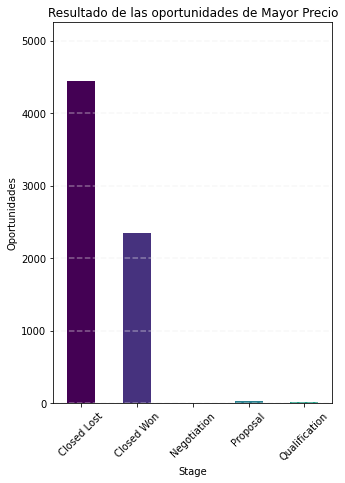

In [27]:
graf1 =mayor_precio_o['Oportunidades'].plot(kind='bar', figsize=(5,7), rot=45, title='Resultado de las oportunidades de Mayor Precio', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportunidades')
ax.set_xlabel('Stage')
lineas = graf1.get_yticks()
for i in lineas:
      graf1.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')

Analisis de menor precio

In [8]:
menor_precio = entrenamiento[entrenamiento['Total_Amount'] < 100]
menor_precio

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6151,8,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_4,Product_Name_4,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,42.24,JPY,470400.0,Closed Lost,Prod_Category_A_None
10,24356,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6151,8,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_226,Product_Name_491,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,59.52,JPY,470400.0,Closed Lost,Prod_Category_A_None
14,24422,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6817,9,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_4,Product_Name_4,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,42.24,JPY,559320.0,Closed Lost,Prod_Category_A_None
15,24423,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6817,9,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_226,Product_Name_491,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,59.52,JPY,559320.0,Closed Lost,Prod_Category_A_None
19,24367,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_5971,10,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_4,Product_Name_4,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,42.24,JPY,579600.0,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16903,24690,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_12292,12780,5,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/1/2015,None,None,None,None,None,None,NaT,1/6/2016,1/7/2016,Person_Name_50,Product_Family_4,Product_Name_4,JPY,NaN,USD,NaN,1/8/2016,1/8/2016,2016 - 1,Q1,2016,NaT,0,USD,42.24,JPY,518760.0,Closed Won,Prod_Category_A_None
16904,24691,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_12292,12780,5,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/1/2015,None,None,None,None,None,None,NaT,1/6/2016,1/7/2016,Person_Name_50,Product_Family_226,Product_Name_491,JPY,NaN,USD,NaN,

In [9]:
menor_precio_o = menor_precio.groupby('Stage').agg({'ID':'count'})
menor_precio_o = menor_precio_o.rename(columns = {'ID':'Oportunidades'})
menor_precio_o.reset_index()



,Stage,Oportunidades
0,Closed Lost,477
1,Closed Won,998


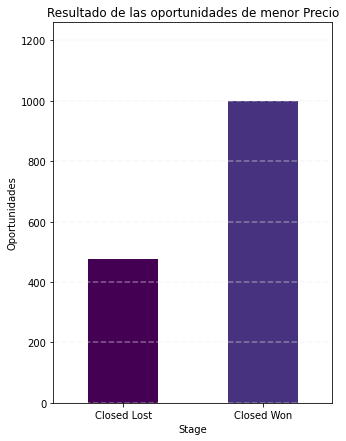

In [28]:
graf2 =menor_precio_o['Oportunidades'].plot(kind='bar', figsize=(5,7), rot=360, title='Resultado de las oportunidades de menor Precio', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportunidades')
ax.set_xlabel('Stage')
lineas = graf2.get_yticks()
for i in lineas:
      graf2.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')

Mayor precio marcas

In [11]:
mayor_precio.groupby('Brand').agg({'ID':'count'}).nlargest(5, 'ID')

,ID
Brand,
None,6128
Other,364
Brand_9,101
Brand_24,34
Brand_5,34


In [12]:
mayor_precio_marcas = mayor_precio[(mayor_precio['Brand'] == 'None') | (mayor_precio['Brand'] == 'Other') | (mayor_precio['Brand'] == 'Brand_9') |\
                                   (mayor_precio['Brand'] == 'Brand_24') | (mayor_precio['Brand'] == 'Brand_5')]
mayor_precio_marcas = mayor_precio_marcas[(mayor_precio_marcas['Stage']=='Closed Won') | (mayor_precio_marcas['Stage']=='Closed Lost')]
mayor_precio_marcas


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,USD,6169176.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_939,5,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,28,USD,14838277.50,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_1618,6,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,NaT,10/7/2016,Person_Name_8,Product_Family_164,Product_Name_308,USD,0.3800,USD,0.38000,2/1/2017,5/1/2017,2017 - 2,Q1,2017,NaT,7,USD,2659494.60,USD,2659494.6,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,USD,120919.50,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,S

In [13]:

mayor_precio_marcas = mayor_precio_marcas.groupby('Stage').agg({'ID':'count'})
mayor_precio_marcas = mayor_precio_marcas.rename(columns = {'ID':'Oportunidades'})
mayor_precio_marcas.reset_index()



,Stage,Oportunidades
0,Closed Lost,4269
1,Closed Won,2348


Text(0.5, 1.0, 'Stages de las marcas de mayor precio')

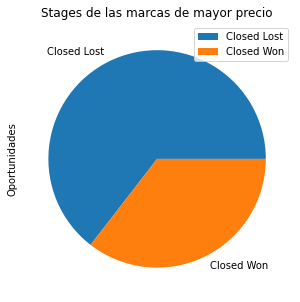

In [14]:
grafico_mayor_marcas = mayor_precio_marcas.plot.pie(y='Oportunidades', figsize=(5, 5))
grafico_mayor_marcas.set_title('Stages de las marcas de mayor precio')

In [15]:
menor_precio.groupby('Brand').agg({'Territory':'count'}).nlargest(5, 'Territory')

,Territory
Brand,
None,1454
Other,21


Menor Precio Marcas

In [16]:
menor_precio_marcas = menor_precio[(menor_precio['Brand'] == 'None') | (menor_precio['Brand'] == 'Other')]
menor_precio_marcas


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6151,8,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_4,Product_Name_4,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,42.24,JPY,470400.0,Closed Lost,Prod_Category_A_None
10,24356,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6151,8,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_226,Product_Name_491,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,59.52,JPY,470400.0,Closed Lost,Prod_Category_A_None
14,24422,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6817,9,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_4,Product_Name_4,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,42.24,JPY,559320.0,Closed Lost,Prod_Category_A_None
15,24423,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6817,9,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_226,Product_Name_491,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,59.52,JPY,559320.0,Closed Lost,Prod_Category_A_None
19,24367,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_5971,10,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_4,Product_Name_4,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,42.24,JPY,579600.0,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16903,24690,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_12292,12780,5,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/1/2015,None,None,None,None,None,None,NaT,1/6/2016,1/7/2016,Person_Name_50,Product_Family_4,Product_Name_4,JPY,NaN,USD,NaN,1/8/2016,1/8/2016,2016 - 1,Q1,2016,NaT,0,USD,42.24,JPY,518760.0,Closed Won,Prod_Category_A_None
16904,24691,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_12292,12780,5,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/1/2015,None,None,None,None,None,None,NaT,1/6/2016,1/7/2016,Person_Name_50,Product_Family_226,Product_Name_491,JPY,NaN,USD,NaN,

In [17]:
menor_precio_marcas = menor_precio_marcas.groupby('Stage').agg({'ID':'count'})
menor_precio_marcas = menor_precio_marcas.rename(columns = {'ID':'Oportunidades'})
menor_precio_marcas.reset_index()


,Stage,Oportunidades
0,Closed Lost,477
1,Closed Won,998


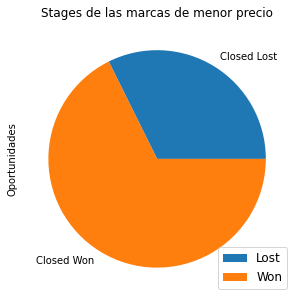

In [18]:
sin_esp_marcas = menor_precio_marcas.plot.pie(y='Oportunidades', figsize=(5, 5))
sin_esp_marcas.set_title('Stages de las marcas de menor precio')
h,l = sin_esp_marcas.get_legend_handles_labels()
sin_esp_marcas.legend(h[:5],["Lost", "Won"], loc=4, fontsize=12)

Mayor precio productos

In [19]:
mayor_precio_productos = mayor_precio.groupby('Product_Name').agg({'ID':'count'}).nlargest(5, 'ID')
mayor_precio_productos

,ID
Product_Name,
Product_Name_220,317
Product_Name_226,261
Product_Name_100,225
Product_Name_96,135
Product_Name_448,131


In [20]:
mayor_precio_productos = mayor_precio[(mayor_precio['Product_Name'] == 'Product_Name_220') | (mayor_precio['Product_Name'] == 'Product_Name_226') |\
                                      (mayor_precio['Product_Name'] == 'Product_Name_100') |\
                                   (mayor_precio['Product_Name'] == 'Product_Name_96') | (mayor_precio['Product_Name'] == 'Product_Name_448')]                              

mayor_precio_productos = mayor_precio_productos[(mayor_precio_productos['Stage']=='Closed Won') | (mayor_precio_productos['Stage']=='Closed Lost')]
mayor_precio_productos

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
24,4915,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,12/9/2015,None,None,Account_Name_423,Opportunity_Name_3858,12,None,Person_Name_49,Person_Name_49,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_1,12/9/2015,None,None,None,None,None,None,NaT,3/31/2016,3/30/2016,Person_Name_49,Product_Family_77,Product_Name_100,USD,0.550,USD,0.55000,1/18/2016,1/31/2016,2016 - 1,Q1,2016,NaT,0,USD,221650.0,USD,221650.00,Closed Lost,Prod_Category_A_None
63,13392,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_7,Germany,Account_Name_263,Opportunity_Name_4062,20,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,12/9/2015,None,None,None,None,None,None,NaT,1/8/2016,12/9/2015,Person_Name_13,Product_Family_77,Product_Name_100,EUR,0.530,USD,0.59948,1/18/2016,1/29/2016,2016 - 1,Q1,2016,NaT,0,USD,120919.5,EUR,103350.00,Closed Won,Prod_Category_A_None
66,18491,EMEA,United Kingdom,0,0,0,0,0,Bureaucratic_Code_4,1/8/2014,None,United Kingdom,Account_Name_270,Opportunity_Name_2804,23,None,Person_Name_18,Person_Name_18,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/10/2015,None,None,None,None,None,None,NaT,12/15/2015,1/12/2017,Person_Name_39,Product_Family_77,Product_Name_100,EUR,0.550,USD,0.62210,1/8/2016,1/12/2016,2016 - 1,Q1,2016,NaT,0,USD,250965.0,EUR,214500.00,Closed Won,Prod_Category_A_None
67,18494,EMEA,United Kingdom,0,0,0,0,0,Bureaucratic_Code_4,1/8/2014,None,United Kingdom,Account_Name_270,Opportunity_Name_2801,24,None,Person_Name_18,Person_Name_18,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/10/2015,None,None,None,None,None,None,NaT,12/16/2015,1/12/2017,Person_Name_39,Product_Family_77,Product_Name_100,EUR,0.550,USD,0.62210,1/15/2016,1/19/2016,2016 - 1,Q1,2016,NaT,0,USD,250965.0,EUR,214500.00,Closed Won,Prod_Category_A_None
70,19680,EMEA,United Kingdom,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,United Kingdom,Account_Name_1988,Opportunity_Name_12137,27,None,Person_Name_18,Person_Name_18,Account_Type_0,Opportunity_Type_2,Non Binding,Delivery_Terms_2,12/12/2015,None,None,None,None,None,None,NaT,12/15/2015,1/12/2017,Person_Name_39,Product_Family_77,Product_Name_100,EUR,0.550,USD,0.62210,1/26/2016,1/29/2016,2016 - 1,Q1,2016,NaT,0,USD,125482.5,EUR,420750.00,Closed Won,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16923,27689,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,6/11/2015,Source_3,Japan,Account_Name_1074,Opportunity_Name_6488,12786,None,Person_Name_61,Person_Name_66,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_5,12/2/2015,None,None,None,None,None,None,NaT,1/23/2016,12/24/2015,Person_Name_66,Product_Family_77,Product_Name_100,JPY,67.000,USD,0.60236,1/11/2016,1/15/2016,2016 - 1,Q1,2016,NaT,0,USD,117062.4,JPY,12194000.00,Closed Won,Prod_Category_A_None
16925,19062,Japan,Japan,0,0,0,0,0,Bureaucratic_Code_4,8/11/2013,Source_11,Japan,Account_Name_1522,Opportunity_Name_869,12788,None,Person_Name_50,Person_Name_30,Accoun

In [21]:
mayor_precio_productos = mayor_precio_productos.groupby('Stage').agg({'ID':'count'})
mayor_precio_productos = mayor_precio_productos.rename(columns = {'ID':'Oportunidades'})
mayor_precio_productos.reset_index()


,Stage,Oportunidades
0,Closed Lost,451
1,Closed Won,614


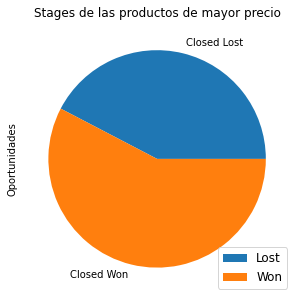

In [22]:
productos_mayor = mayor_precio_productos.plot.pie(y='Oportunidades', figsize=(5, 5))
productos_mayor.set_title('Stages de las productos de mayor precio')
h,l = productos_mayor.get_legend_handles_labels()
productos_mayor.legend(h[:5],["Lost", "Won"], loc=4, fontsize=12)

Menor Precio Productos

In [23]:
menor_precio_productos = menor_precio.groupby('Product_Name').agg({'ID':'count'}).nlargest(5, 'ID')
menor_precio_productos

,ID
Product_Name,
Product_Name_491,513
Product_Name_4,472
Product_Name_20,139
Product_Name_0,136
Product_Name_17,39


In [24]:
menor_precio_productos = menor_precio[(menor_precio['Product_Name'] == 'Product_Name_491') | (menor_precio['Product_Name'] == 'Product_Name_4') |\
                                      (menor_precio['Product_Name'] == 'Product_Name_20') |\
                                   (menor_precio['Product_Name'] == 'Product_Name_0') | (menor_precio['Product_Name'] == 'Product_Name_17')]
menor_precio_productos

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6151,8,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_4,Product_Name_4,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,42.24,JPY,470400.0,Closed Lost,Prod_Category_A_None
10,24356,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6151,8,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_226,Product_Name_491,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,59.52,JPY,470400.0,Closed Lost,Prod_Category_A_None
14,24422,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6817,9,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_4,Product_Name_4,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,42.24,JPY,559320.0,Closed Lost,Prod_Category_A_None
15,24423,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6817,9,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_226,Product_Name_491,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,59.52,JPY,559320.0,Closed Lost,Prod_Category_A_None
19,24367,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_5971,10,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_4,Product_Name_4,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,USD,42.24,JPY,579600.0,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16903,24690,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_12292,12780,5,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/1/2015,None,None,None,None,None,None,NaT,1/6/2016,1/7/2016,Person_Name_50,Product_Family_4,Product_Name_4,JPY,NaN,USD,NaN,1/8/2016,1/8/2016,2016 - 1,Q1,2016,NaT,0,USD,42.24,JPY,518760.0,Closed Won,Prod_Category_A_None
16904,24691,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_12292,12780,5,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/1/2015,None,None,None,None,None,None,NaT,1/6/2016,1/7/2016,Person_Name_50,Product_Family_226,Product_Name_491,JPY,NaN,USD,NaN,

In [25]:
menor_precio_productos = menor_precio_productos.groupby('Stage').agg({'ID':'count'})

menor_precio_productos = menor_precio_productos.rename(columns = {'ID':'Oportunidades'})
menor_precio_productos.reset_index()

,Stage,Oportunidades
0,Closed Lost,396
1,Closed Won,903


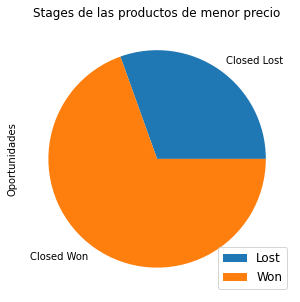

In [26]:
productos_menor = menor_precio_productos.plot.pie(y='Oportunidades', figsize=(5, 5))
productos_menor.set_title('Stages de las productos de menor precio')
h,l = productos_menor.get_legend_handles_labels()
productos_menor.legend(h[:5],["Lost", "Won"], loc=4, fontsize=12)